In [95]:
# download the data
import requests

def save_file(url, file_name):
    r = requests.get(url)
    with open(file_name, 'wb') as f:
        f.write(r.content)
    
save_file('https://homes.cs.washington.edu/~vinitra/cse416/a5/edx_train.csv', 'edx_train.csv')
save_file('https://homes.cs.washington.edu/~vinitra/cse416/a5/edx_test.csv', 'edx_test.csv')

In [96]:
# load the data
import numpy as np
import pandas as pd

edx_train = pd.read_csv('edx_train.csv')  # csv file with features and lables
edx_test = pd.read_csv('edx_test.csv')    # csv file with only features

In [97]:
userids = edx_test['userid_DI']
userids

0       MHxPC130544772
1       MHxPC130524262
2       MHxPC130039229
3       MHxPC130287187
4       MHxPC130483651
             ...      
2915    MHxPC130424830
2916    MHxPC130330709
2917    MHxPC130271947
2918    MHxPC130565465
2919    MHxPC130298020
Name: userid_DI, Length: 2920, dtype: object

In [98]:
edx_test

,course_id,userid_DI,registered,viewed,explored,final_cc_cname_DI,LoE_DI,YoB,gender,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts
0,HarvardX/CB22x/2013_Spring,MHxPC130544772,1,0,0,United States,Bachelor's,1977,m,3/14/2013,3/18/2013,2,2,0,0,0
1,HarvardX/ER22x/2013_Spring,MHxPC130524262,1,1,1,Other Europe,Master's,1979,m,3/12/2013,9/3/2013,736,23,0,19,0
2,HarvardX/PH207x/2012_Fall,MHxPC130039229,1,1,0,United States,Master's,1984,f,8/9/2012,11/3/2012,377,7,49,4,0
3,HarvardX/PH278x/2013_Spring,MHxPC130287187,1,0,0,"Other North & Central Amer., Caribbean",Bachelor's,1986,f,2/22/2013,2/22/2013,1,1,0,0,0
4,HarvardX/CB22x/2013_Spring,MHxPC130483651,1,1,0,Other Europe,Bachelor's,1978,f,2/9/2013,3/18/2013,122,5,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,HarvardX/PH207x/2012_Fall,MHxPC130424830,1,1,1,Poland,Secondary,1990,f,10/22/2012,3/18/2013,5303,48,698,16,0
2916,HarvardX/PH278x/2013_Spring,MHxPC130330709,1,0,0,Unknown/Other,Bachelor's,1987,f,1/1/2013,unk,0,0,0,0,0
2917,HarvardX/CB22x/2013_Spring,MHxPC130271947,1,1,0,United States,Master's,1984,f,3/3/2013,3/20/2013,71,4,0,3,1
2918,HarvardX/ER22x/2013_Spring,MHxPC130565465,1,1,0,India,Bachelor's,1991,m,8/29/2013,9/5/2013,3,2,0,1,0


In [99]:
edx_train

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts
0,HarvardX/CS50x/2012,MHxPC130288921,1,0,0,0,Unknown/Other,Bachelor's,1988.0,m,8/30/12,unk,0.0,0.0,0.0,0.0,0
1,HarvardX/PH207x/2012_Fall,MHxPC130043703,1,1,1,1,India,Doctorate,1970.0,m,9/4/12,1/16/13,2550.0,21.0,10.0,14.0,0
2,HarvardX/CS50x/2012,MHxPC130082773,1,1,0,0,United States,Master's,1983.0,m,2/12/13,2/12/13,10.0,1.0,0.0,1.0,0
3,HarvardX/PH207x/2012_Fall,MHxPC130186614,1,1,1,1,Other Africa,Bachelor's,1984.0,m,10/16/12,1/15/13,6015.0,50.0,616.0,15.0,0
4,HarvardX/CS50x/2012,MHxPC130113075,1,1,0,0,United States,Secondary,1997.0,m,4/11/13,4/12/13,6.0,2.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,HarvardX/CS50x/2012,MHxPC130051294,1,1,0,0,India,Secondary,1990.0,m,10/25/12,3/19/13,3.0,1.0,0.0,2.0,0
8754,HarvardX/CS50x/2012,MHxPC130345596,1,1,0,0,United States,Secondary,1991.0,m,8/25/13,8/25/13,8.0,1.0,0.0,1.0,0
8755,HarvardX/PH278x/2013_Spring,MHxPC130492275,1,0,0,0,India,Master's,1986.0,f,3/21/13,3/21/13,2.0,1.0,0.0,0.0,0
8756,HarvardX/CB22x/2013_Spring,MHxPC130249788,1,0,0,0,United States,Bachelor's,1974.0,m,5/11/13,5/11/13,4.0,1.0,0.0,0.0,0


In [100]:
print(len(edx_train.columns))
print(len(edx_test.columns))
#The difference is the "target" column, that only the train column has. (=certified)

17
16


VISUALIZE/SEE WHAT DATA IS LIKE

In [101]:
print(edx_train.groupby(['certified']).mean().registered)
print(edx_train.groupby(['certified']).mean().viewed)
print(edx_train.groupby(['certified']).mean().explored)

certified
0    1.0
1    1.0
Name: registered, dtype: float64
certified
0    0.484388
1    1.000000
Name: viewed, dtype: float64
certified
0    0.051703
1    0.918453
Name: explored, dtype: float64


In [102]:
import warnings

import matplotlib.pyplot as plt # for graphing
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set()

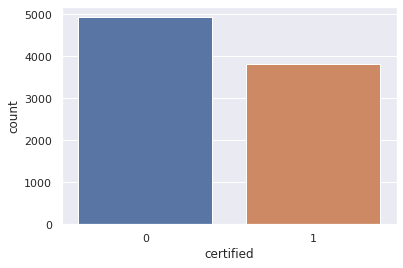

In [103]:
sns.countplot(x='certified', data=edx_train, order=sorted(edx_train['certified'].unique()))  #majority not certified but about half half

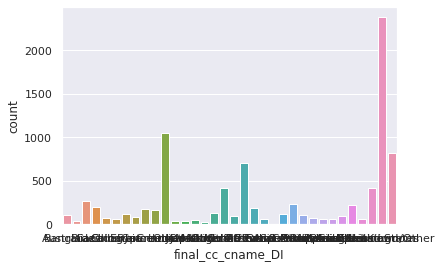

In [104]:
sns.countplot(x='final_cc_cname_DI', data=edx_train, order=sorted(edx_train['final_cc_cname_DI'].unique()))  #some countries rare some common.


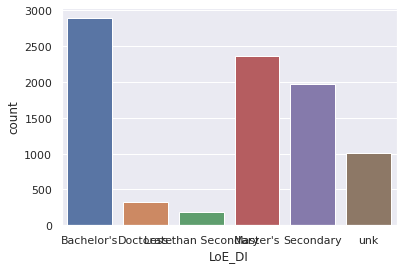

In [105]:
sns.countplot(x='LoE_DI', data=edx_train, order=sorted(edx_train['LoE_DI'].unique())) #most are bachlors

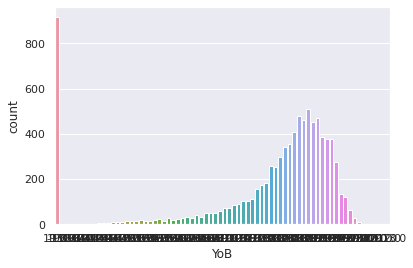

In [106]:
sns.countplot(x='YoB', data=edx_train, order=sorted(edx_train['YoB'].unique())) #normal.. gender

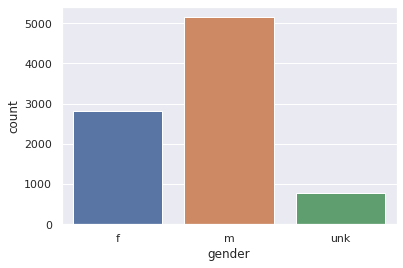

In [107]:
sns.countplot(x='gender', data=edx_train, order=sorted(edx_train['gender'].unique())) #majority are male.

In [108]:
edx_train

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts
0,HarvardX/CS50x/2012,MHxPC130288921,1,0,0,0,Unknown/Other,Bachelor's,1988.0,m,8/30/12,unk,0.0,0.0,0.0,0.0,0
1,HarvardX/PH207x/2012_Fall,MHxPC130043703,1,1,1,1,India,Doctorate,1970.0,m,9/4/12,1/16/13,2550.0,21.0,10.0,14.0,0
2,HarvardX/CS50x/2012,MHxPC130082773,1,1,0,0,United States,Master's,1983.0,m,2/12/13,2/12/13,10.0,1.0,0.0,1.0,0
3,HarvardX/PH207x/2012_Fall,MHxPC130186614,1,1,1,1,Other Africa,Bachelor's,1984.0,m,10/16/12,1/15/13,6015.0,50.0,616.0,15.0,0
4,HarvardX/CS50x/2012,MHxPC130113075,1,1,0,0,United States,Secondary,1997.0,m,4/11/13,4/12/13,6.0,2.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,HarvardX/CS50x/2012,MHxPC130051294,1,1,0,0,India,Secondary,1990.0,m,10/25/12,3/19/13,3.0,1.0,0.0,2.0,0
8754,HarvardX/CS50x/2012,MHxPC130345596,1,1,0,0,United States,Secondary,1991.0,m,8/25/13,8/25/13,8.0,1.0,0.0,1.0,0
8755,HarvardX/PH278x/2013_Spring,MHxPC130492275,1,0,0,0,India,Master's,1986.0,f,3/21/13,3/21/13,2.0,1.0,0.0,0.0,0
8756,HarvardX/CB22x/2013_Spring,MHxPC130249788,1,0,0,0,United States,Bachelor's,1974.0,m,5/11/13,5/11/13,4.0,1.0,0.0,0.0,0


FEATURE/data CLEANING

In [109]:
#Everything done here will be done to test data too

#Get diff between days
#Pass two strings and return days between them
from datetime import date
def get_days_between(str1, str2):   #here we have, month/day/year. 
  str1_arr = str1.split("/")
  str2_arr = str2.split("/")
  d0 = date(int(str1_arr[2]), int(str1_arr[0]), int(str1_arr[1]))   #year, month, day
  d1 = date(int(str2_arr[2]), int(str2_arr[0]), int(str2_arr[1]))
  delta = d1 - d0
  return delta.days


In [110]:
#get a func that will get distance between start and end time and enter it as a col
days_list=[]
for index, row in edx_train.iterrows():
  if (row.start_time_DI != "unk") and (row.last_event_DI != "unk"):
    num_days = get_days_between(row.start_time_DI, row.last_event_DI)
    days_list.append(num_days)
  else:
    num_days = 1000 #make it arbitrarily long? I think
    days_list.append(num_days)
  
days_list_df = pd.DataFrame(days_list)
edx_train['days_to_complete_course'] = days_list_df
edx_train #nice the days get added


#TO TEST DATA
days_list=[]
for index, row in edx_test.iterrows():
  if (row.start_time_DI != "unk") and (row.last_event_DI != "unk"):
    num_days = get_days_between(row.start_time_DI, row.last_event_DI)
    days_list.append(num_days)
  else:
    num_days = 1000 #make it arbitrarily long? I think
    days_list.append(num_days)
  
days_list_df = pd.DataFrame(days_list)
edx_test['days_to_complete_course'] = days_list_df
edx_test #nice the days get added

,course_id,userid_DI,registered,viewed,explored,final_cc_cname_DI,LoE_DI,YoB,gender,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,days_to_complete_course
0,HarvardX/CB22x/2013_Spring,MHxPC130544772,1,0,0,United States,Bachelor's,1977,m,3/14/2013,3/18/2013,2,2,0,0,0,4
1,HarvardX/ER22x/2013_Spring,MHxPC130524262,1,1,1,Other Europe,Master's,1979,m,3/12/2013,9/3/2013,736,23,0,19,0,175
2,HarvardX/PH207x/2012_Fall,MHxPC130039229,1,1,0,United States,Master's,1984,f,8/9/2012,11/3/2012,377,7,49,4,0,86
3,HarvardX/PH278x/2013_Spring,MHxPC130287187,1,0,0,"Other North & Central Amer., Caribbean",Bachelor's,1986,f,2/22/2013,2/22/2013,1,1,0,0,0,0
4,HarvardX/CB22x/2013_Spring,MHxPC130483651,1,1,0,Other Europe,Bachelor's,1978,f,2/9/2013,3/18/2013,122,5,0,3,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,HarvardX/PH207x/2012_Fall,MHxPC130424830,1,1,1,Poland,Secondary,1990,f,10/22/2012,3/18/2013,5303,48,698,16,0,147
2916,HarvardX/PH278x/2013_Spring,MHxPC130330709,1,0,0,Unknown/Other,Bachelor's,1987,f,1/1/2013,unk,0,0,0,0,0,1000
2917,HarvardX/CB22x/2013_Spring,MHxPC130271947,1,1,0,United States,Master's,1984,f,3/3/2013,3/20/2013,71,4,0,3,1,17
2918,HarvardX/ER22x/2013_Spring,MHxPC130565465,1,1,0,India,Bachelor's,1991,m,8/29/2013,9/5/2013,3,2,0,1,0,7


In [111]:
#Keep all the features for now.
#We they actually are dooesnt change when we add the hot encoding, we we can get teh user ids from the original sets.

#Drop start date, end date,  userId_DI
#Certified is the target. 


features = [
    'course_id',                     # grade of the loan (e.g. A or B)
    'registered',                 # one year or less of employment (0 or 1)
    'viewed',            # number of years of employment (a number)
    'explored',            # home_ownership status (one of own, mortgage, rent or other)
    'final_cc_cname_DI',                       # debt to income ratio (a number)
    'LoE_DI',                   # the purpose of the loan (one of many values)
    'YoB',                      # the term of the loan (36 months or 60 months)
    'gender',          # has borrower had a delinquincy (0 or 1)
    'days_to_complete_course',     # has borrower had 90 day or worse rating (0 or 1)
    'nevents',
    'ndays_act', 
     'nplay_video', 
      'nchapters', 
       'nforum_posts'        # total late fees received to day (a number)
]

target = 'certified'  
edx_train_cleaned = edx_train[features + [target]]
edx_train_cleaned.head() 

,course_id,registered,viewed,explored,final_cc_cname_DI,LoE_DI,YoB,gender,days_to_complete_course,nevents,ndays_act,nplay_video,nchapters,nforum_posts,certified
0,HarvardX/CS50x/2012,1,0,0,Unknown/Other,Bachelor's,1988.0,m,1000,0.0,0.0,0.0,0.0,0,0
1,HarvardX/PH207x/2012_Fall,1,1,1,India,Doctorate,1970.0,m,134,2550.0,21.0,10.0,14.0,0,1
2,HarvardX/CS50x/2012,1,1,0,United States,Master's,1983.0,m,0,10.0,1.0,0.0,1.0,0,0
3,HarvardX/PH207x/2012_Fall,1,1,1,Other Africa,Bachelor's,1984.0,m,91,6015.0,50.0,616.0,15.0,0,1
4,HarvardX/CS50x/2012,1,1,0,United States,Secondary,1997.0,m,1,6.0,2.0,0.0,1.0,0,0


In [112]:
#Hot encoding to convert to numerical vals
edx_train_cleaned = pd.get_dummies(edx_train_cleaned)
features = list(edx_train_cleaned.columns)
features.remove(target)
edx_train_cleaned[features].head()

,registered,viewed,explored,YoB,days_to_complete_course,nevents,ndays_act,nplay_video,nchapters,nforum_posts,course_id_HarvardX/CB22x/2013_Spring,course_id_HarvardX/CS50x/2012,course_id_HarvardX/ER22x/2013_Spring,course_id_HarvardX/PH207x/2012_Fall,course_id_HarvardX/PH278x/2013_Spring,final_cc_cname_DI_Australia,final_cc_cname_DI_Bangladesh,final_cc_cname_DI_Brazil,final_cc_cname_DI_Canada,final_cc_cname_DI_China,final_cc_cname_DI_Colombia,final_cc_cname_DI_Egypt,final_cc_cname_DI_France,final_cc_cname_DI_Germany,final_cc_cname_DI_Greece,final_cc_cname_DI_India,final_cc_cname_DI_Indonesia,final_cc_cname_DI_Japan,final_cc_cname_DI_Mexico,final_cc_cname_DI_Morocco,final_cc_cname_DI_Nigeria,final_cc_cname_DI_Other Africa,final_cc_cname_DI_Other East Asia,final_cc_cname_DI_Other Europe,final_cc_cname_DI_Other Middle East/Central Asia,"final_cc_cname_DI_Other North & Central Amer., Caribbean",final_cc_cname_DI_Other Oceania,final_cc_cname_DI_Other South America,final_cc_cname_DI_Other South Asia,final_cc_cname_DI_Pakistan,final_cc_cname_DI_Philippines,final_cc_cname_DI_Poland,final_cc_cname_DI_Portugal,final_cc_cname_DI_Russian Federation,final_cc_cname_DI_Spain,final_cc_cname_DI_Ukraine,final_cc_cname_DI_United Kingdom,final_cc_cname_DI_United States,final_cc_cname_DI_Unknown/Other,LoE_DI_Bachelor's,LoE_DI_Doctorate,LoE_DI_Less than Secondary,LoE_DI_Master's,LoE_DI_Secondary,LoE_DI_unk,gender_f,gender_m,gender_unk
0,1,0,0,1988.0,1000,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1,1,1,1,1970.0,134,2550.0,21.0,10.0,14.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,1,0,1983.0,0,10.0,1.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,1,1,1,1984.0,91,6015.0,50.0,616.0,15.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1,1,0,1997.0,1,6.0,2.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [113]:
#Now, do the same cleaning (drop cols) and turning into numbers to the test data. 
#Do the same for test, but we should have one less column.
del edx_test['start_time_DI']
del edx_test['last_event_DI']
del edx_test['userid_DI']

In [114]:
#edx_test
test_data = pd.get_dummies(edx_test)
features = list(test_data.columns)
#features
#features.remove(target)
test_data[features].head()

,registered,viewed,explored,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,days_to_complete_course,course_id_HarvardX/CB22x/2013_Spring,course_id_HarvardX/CS50x/2012,course_id_HarvardX/ER22x/2013_Spring,course_id_HarvardX/PH207x/2012_Fall,course_id_HarvardX/PH278x/2013_Spring,final_cc_cname_DI_Australia,final_cc_cname_DI_Bangladesh,final_cc_cname_DI_Brazil,final_cc_cname_DI_Canada,final_cc_cname_DI_China,final_cc_cname_DI_Colombia,final_cc_cname_DI_Egypt,final_cc_cname_DI_France,final_cc_cname_DI_Germany,final_cc_cname_DI_Greece,final_cc_cname_DI_India,final_cc_cname_DI_Indonesia,final_cc_cname_DI_Japan,final_cc_cname_DI_Mexico,final_cc_cname_DI_Morocco,final_cc_cname_DI_Nigeria,final_cc_cname_DI_Other Africa,final_cc_cname_DI_Other East Asia,final_cc_cname_DI_Other Europe,final_cc_cname_DI_Other Middle East/Central Asia,"final_cc_cname_DI_Other North & Central Amer., Caribbean",final_cc_cname_DI_Other Oceania,final_cc_cname_DI_Other South America,final_cc_cname_DI_Other South Asia,final_cc_cname_DI_Pakistan,final_cc_cname_DI_Philippines,final_cc_cname_DI_Poland,final_cc_cname_DI_Portugal,final_cc_cname_DI_Russian Federation,final_cc_cname_DI_Spain,final_cc_cname_DI_Ukraine,final_cc_cname_DI_United Kingdom,final_cc_cname_DI_United States,final_cc_cname_DI_Unknown/Other,LoE_DI_Bachelor's,LoE_DI_Doctorate,LoE_DI_Less than Secondary,LoE_DI_Master's,LoE_DI_Secondary,LoE_DI_unk,gender_f,gender_m,gender_unk
0,1,0,0,1977,2,2,0,0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,1,1,1,1979,736,23,0,19,0,175,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,1,0,1984,377,7,49,4,0,86,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,1,0,0,1986,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,1,0,1978,122,5,0,3,0,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


Therefore, we initially keep all of our features, maybe we will change this later. We do do transformations though. We have to change all the features to numerical values so we can use the decision tree functions. I also calculated the days it took for them to finish/do the course, where if it was 'unk' I used 1000 arbitrarily. 

3 DIFF CLASSIFIERS

In [115]:
from sklearn.model_selection import train_test_split

train_data, validation_data = train_test_split(edx_train_cleaned, test_size=0.2, random_state=1)

In [116]:
features

['registered',
 'viewed',
 'explored',
 'YoB',
 'nevents',
 'ndays_act',
 'nplay_video',
 'nchapters',
 'nforum_posts',
 'days_to_complete_course',
 'course_id_HarvardX/CB22x/2013_Spring',
 'course_id_HarvardX/CS50x/2012',
 'course_id_HarvardX/ER22x/2013_Spring',
 'course_id_HarvardX/PH207x/2012_Fall',
 'course_id_HarvardX/PH278x/2013_Spring',
 'final_cc_cname_DI_Australia',
 'final_cc_cname_DI_Bangladesh',
 'final_cc_cname_DI_Brazil',
 'final_cc_cname_DI_Canada',
 'final_cc_cname_DI_China',
 'final_cc_cname_DI_Colombia',
 'final_cc_cname_DI_Egypt',
 'final_cc_cname_DI_France',
 'final_cc_cname_DI_Germany',
 'final_cc_cname_DI_Greece',
 'final_cc_cname_DI_India',
 'final_cc_cname_DI_Indonesia',
 'final_cc_cname_DI_Japan',
 'final_cc_cname_DI_Mexico',
 'final_cc_cname_DI_Morocco',
 'final_cc_cname_DI_Nigeria',
 'final_cc_cname_DI_Other Africa',
 'final_cc_cname_DI_Other East Asia',
 'final_cc_cname_DI_Other Europe',
 'final_cc_cname_DI_Other Middle East/Central Asia',
 'final_cc_cname_D

In [117]:
train_data

,registered,viewed,explored,YoB,days_to_complete_course,nevents,ndays_act,nplay_video,nchapters,nforum_posts,certified,course_id_HarvardX/CB22x/2013_Spring,course_id_HarvardX/CS50x/2012,course_id_HarvardX/ER22x/2013_Spring,course_id_HarvardX/PH207x/2012_Fall,course_id_HarvardX/PH278x/2013_Spring,final_cc_cname_DI_Australia,final_cc_cname_DI_Bangladesh,final_cc_cname_DI_Brazil,final_cc_cname_DI_Canada,final_cc_cname_DI_China,final_cc_cname_DI_Colombia,final_cc_cname_DI_Egypt,final_cc_cname_DI_France,final_cc_cname_DI_Germany,final_cc_cname_DI_Greece,final_cc_cname_DI_India,final_cc_cname_DI_Indonesia,final_cc_cname_DI_Japan,final_cc_cname_DI_Mexico,final_cc_cname_DI_Morocco,final_cc_cname_DI_Nigeria,final_cc_cname_DI_Other Africa,final_cc_cname_DI_Other East Asia,final_cc_cname_DI_Other Europe,final_cc_cname_DI_Other Middle East/Central Asia,"final_cc_cname_DI_Other North & Central Amer., Caribbean",final_cc_cname_DI_Other Oceania,final_cc_cname_DI_Other South America,final_cc_cname_DI_Other South Asia,final_cc_cname_DI_Pakistan,final_cc_cname_DI_Philippines,final_cc_cname_DI_Poland,final_cc_cname_DI_Portugal,final_cc_cname_DI_Russian Federation,final_cc_cname_DI_Spain,final_cc_cname_DI_Ukraine,final_cc_cname_DI_United Kingdom,final_cc_cname_DI_United States,final_cc_cname_DI_Unknown/Other,LoE_DI_Bachelor's,LoE_DI_Doctorate,LoE_DI_Less than Secondary,LoE_DI_Master's,LoE_DI_Secondary,LoE_DI_unk,gender_f,gender_m,gender_unk
5229,1,0,0,1989.0,1000,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
413,1,1,1,1983.0,204,1771.0,31.0,0.0,33.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3327,1,1,1,1985.0,201,6649.0,40.0,1079.0,14.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
597,1,1,0,1978.0,231,217.0,15.0,0.0,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1190,1,1,0,1987.0,52,6.0,1.0,0.0,2.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1,1,1,1986.0,223,3412.0,27.0,369.0,15.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
7813,1,1,1,1986.0,189,3870.0,51.0,271.0,14.0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
905,1,1,1,1985.0,75,1206.0,12.0,0.0,13.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
5192,1,1,1,1969.0,108,4279.0,29.0,586.0,14.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0


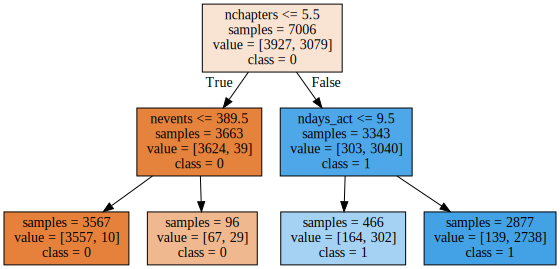

In [118]:
#Visualize the tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Model 1: Small tree model. 
small_tree_model = DecisionTreeClassifier(max_depth=2, random_state=1)
small_tree_model.fit(train_data[features], train_data[target])

# Hack to fail gracefully if graphviz is not installed
try:
    import graphviz

    def draw_tree(tree_model, features):
        """
        visualizes a Decision Tree
        """
        tree_data = tree.export_graphviz(tree_model, 
                                     impurity=False, 
                                     feature_names=features,
                                     class_names=tree_model.classes_.astype(str),
                                     filled=True,
                                     out_file=None)
        graph = graphviz.Source(tree_data) 
        display(graph)
        
    draw_tree(small_tree_model, features)
except:
    print('Graphviz not installed. You can view the picture here! https://courses.cs.washington.edu/courses/cse416/20su/files/assignment-resources/concept/cq4/tree.png')

In [119]:
#Model 2: Tree with max_depth=6

decision_tree_model = DecisionTreeClassifier(max_depth=6, random_state=1)
decision_tree_model.fit(train_data[features], train_data[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [120]:
#3rd model (big tree)
big_tree_model = DecisionTreeClassifier(max_depth=10, random_state=1)
big_tree_model.fit(train_data[features], train_data[target])



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [121]:
from sklearn.metrics import accuracy_score

#ORDER IN TERMS OF SIZE

#Accuracy 1st tree train
predicted = small_tree_model.predict(train_data[features])
actual = train_data[target]
accuracy = accuracy_score(predicted, actual)
print(accuracy)

#Accuracy 2nd tree train
predicted = decision_tree_model.predict(train_data[features])
actual = train_data[target]
accuracy = accuracy_score(predicted, actual)
print(accuracy)

#Accuracy 3st tree train
predicted = big_tree_model.predict(train_data[features])
actual = train_data[target]
accuracy = accuracy_score(predicted, actual)
print(accuracy)



0.9511846988295747
0.978304310590922
0.991435912075364


In [122]:
#ORDER IN TERMS OF SIZE

#Accuracy 1st tree vali
predicted = small_tree_model.predict(validation_data[features])
actual = validation_data[target]
accuracy = accuracy_score(predicted, actual)
print(accuracy)

#Accuracy 2nd tree vali
predicted = decision_tree_model.predict(validation_data[features])  #This one is best for the moment.
actual = validation_data[target]
accuracy = accuracy_score(predicted, actual)
print(accuracy)

#Accuracy 3nd tree vali
predicted = big_tree_model.predict(validation_data[features])   #We see accuracy start to go down because it is overfitting.
actual = validation_data[target]
accuracy = accuracy_score(predicted, actual)
print(accuracy)

0.9503424657534246
0.9726027397260274
0.9680365296803652


USING ENSEMBLES TO MAKE THIS BETTER

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
#Model 4: random forest -- all the variatioonos of Random forest

forest_model = RandomForestClassifier(max_depth=5, random_state=0)
forest_model.fit(train_data[features], train_data[target])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [125]:
#Accuracy 4th tree train
predicted = forest_model.predict(train_data[features])
actual = train_data[target]
accuracy = accuracy_score(predicted, actual)
print(accuracy)

#Accuracy 4th tree vali
predicted = forest_model.predict(validation_data[features])
actual = validation_data[target]
accuracy = accuracy_score(predicted, actual)
print(accuracy)

0.9660291178989437
0.9634703196347032


Depth 1
Depth 2
Depth 3
Depth 4
Depth 5
Depth 6
Depth 7
Depth 8
Depth 9
Depth 10
Depth 11
Depth 12
Depth 13
Depth 14
Depth 15
Depth 16
Depth 17
Depth 18
Depth 19
Depth 20
Depth 21
Depth 22
Depth 23
Depth 24


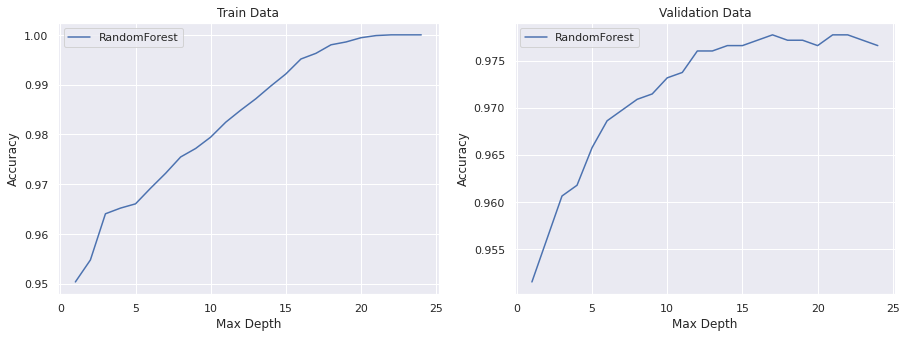

In [126]:
depths = list(range(1, 25, 1))

rf_accuracies = []
for i in depths:
    print(f'Depth {i}')
    
    rf = RandomForestClassifier(500, max_depth=i)   #Increase the size of the trees in each model!
    rf.fit(train_data[features], train_data[target])
    
    rf_accuracies.append((     
        accuracy_score(rf.predict(train_data[features]), train_data[target]),
        accuracy_score(rf.predict(validation_data[features]), validation_data[target])
    ))

# Then plot them 
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(depths, [acc[0] for acc in rf_accuracies], label='RandomForest')

axs[1].plot(depths, [acc[1] for acc in rf_accuracies], label='RandomForest')

# Customize plots
axs[0].set_title('Train Data')
axs[1].set_title('Validation Data')
for ax in axs:
    ax.legend()
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Accuracy')

We can see that best depth here is at max depth = 13 if num trees are lower..  We could use that one. Increasing the number of trees in the model seems to make the model much slower. But-- it also makes the model better.  If the num trees are 500, then from the validation data it seems max depth = 14 might be the best models so far. 

Attempting adaboost foor fun

In [127]:
#Next Model 5: trying out adaboost to compare which has better accuracy--

from sklearn.ensemble import AdaBoostClassifier

In [128]:
adaboost_model1 = AdaBoostClassifier(n_estimators=10000, random_state=0)
adaboost_model1.fit(train_data[features], train_data[target])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=10000, random_state=0)

In [129]:
#Accuracy 5th tree train
predicted = adaboost_model1.predict(train_data[features])
actual = train_data[target]
accuracy = accuracy_score(predicted, actual)
print(accuracy)

#Accuracy 5th tree vali
predicted = adaboost_model1.predict(validation_data[features])
actual = validation_data[target]
accuracy = accuracy_score(predicted, actual)
print(accuracy)

0.9904367684841564
0.9554794520547946


Hmm.. for soome reason the randoom forest is doing muchh better than this one? So will go with that one instead. 

MAKE THE ACTUAL PREDICTIONS

In [130]:
test_data

,registered,viewed,explored,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,days_to_complete_course,course_id_HarvardX/CB22x/2013_Spring,course_id_HarvardX/CS50x/2012,course_id_HarvardX/ER22x/2013_Spring,course_id_HarvardX/PH207x/2012_Fall,course_id_HarvardX/PH278x/2013_Spring,final_cc_cname_DI_Australia,final_cc_cname_DI_Bangladesh,final_cc_cname_DI_Brazil,final_cc_cname_DI_Canada,final_cc_cname_DI_China,final_cc_cname_DI_Colombia,final_cc_cname_DI_Egypt,final_cc_cname_DI_France,final_cc_cname_DI_Germany,final_cc_cname_DI_Greece,final_cc_cname_DI_India,final_cc_cname_DI_Indonesia,final_cc_cname_DI_Japan,final_cc_cname_DI_Mexico,final_cc_cname_DI_Morocco,final_cc_cname_DI_Nigeria,final_cc_cname_DI_Other Africa,final_cc_cname_DI_Other East Asia,final_cc_cname_DI_Other Europe,final_cc_cname_DI_Other Middle East/Central Asia,"final_cc_cname_DI_Other North & Central Amer., Caribbean",final_cc_cname_DI_Other Oceania,final_cc_cname_DI_Other South America,final_cc_cname_DI_Other South Asia,final_cc_cname_DI_Pakistan,final_cc_cname_DI_Philippines,final_cc_cname_DI_Poland,final_cc_cname_DI_Portugal,final_cc_cname_DI_Russian Federation,final_cc_cname_DI_Spain,final_cc_cname_DI_Ukraine,final_cc_cname_DI_United Kingdom,final_cc_cname_DI_United States,final_cc_cname_DI_Unknown/Other,LoE_DI_Bachelor's,LoE_DI_Doctorate,LoE_DI_Less than Secondary,LoE_DI_Master's,LoE_DI_Secondary,LoE_DI_unk,gender_f,gender_m,gender_unk
0,1,0,0,1977,2,2,0,0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,1,1,1,1979,736,23,0,19,0,175,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,1,0,1984,377,7,49,4,0,86,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,1,0,0,1986,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,1,0,1978,122,5,0,3,0,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,1,1,1,1990,5303,48,698,16,0,147,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2916,1,0,0,1987,0,0,0,0,0,1000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
2917,1,1,0,1984,71,4,0,3,1,17,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2918,1,1,0,1991,3,2,0,1,0,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [131]:
#Choose the best model found so far
rf = RandomForestClassifier(500, max_depth=14)   
rf.fit(train_data[features], train_data[target])
predicted = rf.predict(test_data[features])


In [132]:
predicted_df = pd.DataFrame(predicted)
len(predicted_df) #ok great, now convert to csv ok ----
predicted_df

,0
0,0
1,1
2,0
3,0
4,0
...,...
2915,1
2916,0
2917,0
2918,0


In [133]:
#Concat uderID and predicted together,
data = {}
df = pd.DataFrame(data)
df['userid_DI'] = userids
df['certified'] = predicted_df
#df
df.to_csv('submission.csv', index = False) 
#print(csv)


RoC curve

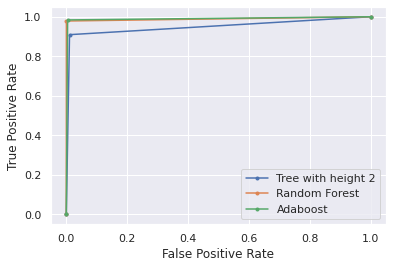

In [136]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn import metrics

#model1: small tree
y = small_tree_model.predict(train_data[features])
pred = train_data[target]
npy = np.asarray(y, dtype=np.float32)
nppred = np.asarray(pred, dtype=np.float32)
#print(npy)
fpr1, tpr1, thresholds1 = metrics.roc_curve(npy, nppred)

#model 2:
#Random forest
y = rf.predict(train_data[features])
pred = train_data[target]
npy = np.asarray(y, dtype=np.float32)
nppred = np.asarray(pred, dtype=np.float32)
#print(npy)
fpr2, tpr2, thresholds2 = metrics.roc_curve(npy, nppred)

#model 3:
#Ada
y = adaboost_model1.predict(train_data[features])
pred = train_data[target]
npy = np.asarray(y, dtype=np.float32)
nppred = np.asarray(pred, dtype=np.float32)
#print(npy)
fpr3, tpr3, thresholds3 = metrics.roc_curve(npy, nppred)


#---Show on plot
pyplot.plot(fpr1, tpr1, marker='.', label='Tree with height 2')
pyplot.plot(fpr2, tpr2, marker='.', label='Random Forest')
pyplot.plot(fpr3, tpr3, marker='.', label='Adaboost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()